<a href="https://colab.research.google.com/github/Ericaakanko/classification-models-for-predicting-aromatase-inhibitors/blob/main/classifcation_ProjectAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/aroma/aromataseUse1.csv')
df.head()



,Molecule ChEMBL ID,Molecular Weight,#RO5,AlogP,Smiles,Standard Type,Standard Value,Activity,Comment
0,CHEMBL3245350,408.61,1,6,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,Activity,NaN,0,Not Active
1,CHEMBL491602,370.50,1,5.07,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,Activity,NaN,0,Not Active
2,CHEMBL3245348,374.59,1,5.6,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,Activity,NaN,0,Not Active
3,CHEMBL490388,409.32,1,5.59,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,Activity,NaN,0,Not Active
4,CHEMBL206175,290.32,0,4.1,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,Activity,NaN,0,Not Active


In [ ]:
df1 = df.drop_duplicates(['Smiles'], keep ='first')
df1

,Molecule ChEMBL ID,Molecular Weight,#RO5,AlogP,Smiles,Standard Type,Standard Value,Activity,Comment
0,CHEMBL3245350,408.61,1,6,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,Activity,NaN,0,Not Active
1,CHEMBL491602,370.50,1,5.07,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,Activity,NaN,0,Not Active
2,CHEMBL3245348,374.59,1,5.6,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,Activity,NaN,0,Not Active
3,CHEMBL490388,409.32,1,5.59,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,Activity,NaN,0,Not Active
4,CHEMBL206175,290.32,0,4.1,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,Activity,NaN,0,Not Active
...,...,...,...,...,...,...,...,...,...
4048,CHEMBL3754469,314.43,0,3.06,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,Ki,926.00,1,Active
4049,CHEMBL296617,314.42,0,3.06,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,Ki,926.00,1,Active
4083,CHEMBL386630,288.43,0,3.88,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,Km,210.00,1,Active
4089,CHEMBL186079,481.57,1,6.73,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,Log IC50,2.72,1,Active


In [ ]:
df2 = df1[df1.Activity.notna()]
df2

,Molecule ChEMBL ID,Molecular Weight,#RO5,AlogP,Smiles,Standard Type,Standard Value,Activity,Comment
0,CHEMBL3245350,408.61,1,6,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,Activity,NaN,0,Not Active
1,CHEMBL491602,370.50,1,5.07,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,Activity,NaN,0,Not Active
2,CHEMBL3245348,374.59,1,5.6,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,Activity,NaN,0,Not Active
3,CHEMBL490388,409.32,1,5.59,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,Activity,NaN,0,Not Active
4,CHEMBL206175,290.32,0,4.1,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,Activity,NaN,0,Not Active
...,...,...,...,...,...,...,...,...,...
4048,CHEMBL3754469,314.43,0,3.06,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,Ki,926.00,1,Active
4049,CHEMBL296617,314.42,0,3.06,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,Ki,926.00,1,Active
4083,CHEMBL386630,288.43,0,3.88,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,Km,210.00,1,Active
4089,CHEMBL186079,481.57,1,6.73,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,Log IC50,2.72,1,Active


In [ ]:
selection = ['Molecule ChEMBL ID', 'Smiles', 'Activity']
df3 = df2[selection]
df3

,Molecule ChEMBL ID,Smiles,Activity
0,CHEMBL3245350,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,0
1,CHEMBL491602,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,0
2,CHEMBL3245348,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,0
3,CHEMBL490388,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,0
4,CHEMBL206175,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,0
...,...,...,...
4048,CHEMBL3754469,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,1
4049,CHEMBL296617,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,1
4083,CHEMBL386630,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,1
4089,CHEMBL186079,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,1


In [ ]:
#importing libraries
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 12.9 MB/s eta 0:00:00


In [ ]:
! unzip /content/drive/MyDrive/aroma/fingerprints_xml.zip

Archive:  /content/drive/MyDrive/aroma/fingerprints_xml.zip
  inflating: AtomPairs2DFingerprintCount.xml  
  inflating: AtomPairs2DFingerprinter.xml  
  inflating: EStateFingerprinter.xml  
  inflating: ExtendedFingerprinter.xml  
  inflating: Fingerprinter.xml       
  inflating: GraphOnlyFingerprinter.xml  
  inflating: KlekotaRothFingerprintCount.xml  
  inflating: KlekotaRothFingerprinter.xml  
  inflating: MACCSFingerprinter.xml  
  inflating: PubchemFingerprinter.xml  
  inflating: SubstructureFingerprintCount.xml  
  inflating: SubstructureFingerprinter.xml  


In [ ]:
#listing and sorting the downloaded files
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
#Creating a list of present files
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
#Conactnating necessary columns
df4 = pd.concat( [df3['Smiles'],df3['Molecule ChEMBL ID']], axis=1 )
df4.to_csv('molecule.smi', sep='\t', index=False, header=False)
df4

,Smiles,Molecule ChEMBL ID
0,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,CHEMBL3245350
1,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,CHEMBL491602
2,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,CHEMBL3245348
3,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,CHEMBL490388
4,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,CHEMBL206175
...,...,...
4048,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,CHEMBL3754469
4049,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,CHEMBL296617
4083,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,CHEMBL386630
4089,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,CHEMBL186079


In [ ]:
#Importing PubChem
fp[ 'PubChem']

'PubchemFingerprinter.xml'

In [ ]:
#Setting the fingerprint module

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Puchem.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Pubchem.csv'
                #descriptortypes='PuchemFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
               detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
df7=pd.read_csv('/content/drive/MyDrive/aroma/descriptorsC')
df7.head()


,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3245350,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL491602,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3245348,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL490388,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL206175,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df7.drop('Name', axis =1)

In [ ]:
#Removing low Variance
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(X)

In [ ]:
x.shape

(2739, 153)

In [ ]:
y = df3.Activity
y

0       0
1       0
2       0
3       0
4       0
       ..
4048    1
4049    1
4083    1
4089    1
4090    1
Name: Activity, Length: 2739, dtype: int64

MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
y_test_pred = rf_model.predict(X_test)
y_test_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
y_train_pred = rf_model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y.shape

(2739,)

In [ ]:
y_test_pred.shape

(822,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[414  84]
 [ 91 233]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       498
           1       0.74      0.72      0.73       324

    accuracy                           0.79       822
   macro avg       0.78      0.78      0.78       822
weighted avg       0.79      0.79      0.79       822



In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.943464293643765

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

0.5526351352312759

ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

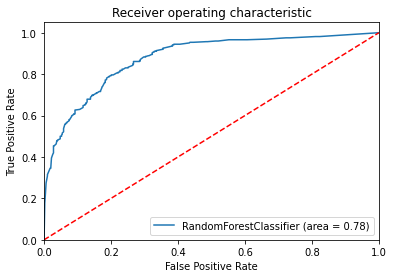

In [ ]:
rf_model_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % rf_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_model_ROC')
plt.show()

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       498
           1       0.74      0.70      0.72       324

    accuracy                           0.79       822
   macro avg       0.78      0.77      0.77       822
weighted avg       0.79      0.79      0.79       822



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7871046228710462
Precision: 0.742671009771987
recall: 0.7037037037037037


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[419  79]
 [ 96 228]]


In [ ]:
#makepredictions
y_train_pred= clf.predict(X_train)

In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.72145128693551

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.5506377589393631

LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=100.0, penalty='l1', solver ='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[399  83]
 [ 94 246]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       482
           1       0.75      0.72      0.74       340

    accuracy                           0.78       822
   macro avg       0.78      0.78      0.78       822
weighted avg       0.78      0.78      0.78       822



In [ ]:
y_train_pred =logreg.predict(X_train)

In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.7956715361810496

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.5541832358318227

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.19      0.31       482
           1       0.45      0.92      0.60       340

    accuracy                           0.49       822
   macro avg       0.61      0.56      0.45       822
weighted avg       0.64      0.49      0.43       822



In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.16068103998721497

K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       482
           1       0.76      0.75      0.75       340

    accuracy                           0.80       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.80      0.80      0.80       822



In [ ]:
y_train_pred= knn1.predict(X_train)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.9366866105916634

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred_1)
mcc_test

0.5850230442849867

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       482
           1       0.74      0.75      0.75       340

    accuracy                           0.79       822
   macro avg       0.78      0.79      0.78       822
weighted avg       0.79      0.79      0.79       822



In [ ]:
y_train_pred= dtc.predict(X_train)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.9418010083649155

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.5694103908264877

HYPERPARAMETER TUNING



# **DEEP NEURAL NETWORK**

In [ ]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pi
X_train=X_train/255
X_test=X_test/255

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 0.1544 - accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

In [ ]:
# Predict the Test set results
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#probabilities prediction
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_model.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
knn1_probs = knn1.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
clf_probs = clf.predict_proba(X_test)


In [ ]:
#prediction for the positive outcome is kept
rf_probs = rf_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
knn1_probs = knn1_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
clf_probs = clf_probs[:, 1]

In [ ]:
#calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
knn1_fpr, knn1_tpr, _ = roc_curve(y_test, knn1_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)
knn1_auc = roc_auc_score(y_test, knn1_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
clf_auc = roc_auc_score(y_test, clf_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Logreg: AUROC = %.3f' % (logreg_auc))
print('KNN: AUROC = %.3f' % (knn1_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('SVM: AUROC = %.3f' % (clf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.965
Logreg: AUROC = 0.839
KNN: AUROC = 0.792
Decision Tree: AUROC = 0.797
SVM: AUROC = 0.893


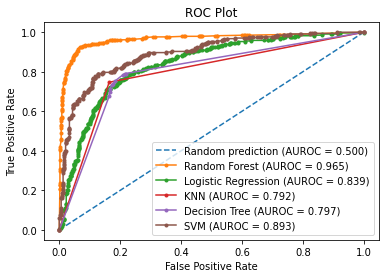

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
plt.plot(knn1_fpr, knn1_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn1_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(clf_fpr, clf_tpr, marker='.', label='SVM (AUROC = %0.3f)' % clf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()